---

Author      : Dilan Kilic (kilicd15@itu.edu.tr)  <br> 
Student ID  : 511211159  <br> 
created on  : 01.04.2023  <br> 
revised on  : 04.04.2023  <br> 

Description : This code is the implementation of L2 air dataset regression problem including the HPO using Optuna libraies.

---

# Import Libraries

In [1]:
# import libraries

# main
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 28
import pandas as pd
import seaborn as sns
import time

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# grid-search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# machine learning models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#import skorch
#from skorch import NeuralNetRegressor
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#from skorch.callbacks import LRScheduler
from torch.optim.lr_scheduler import StepLR

# dimensionality reduction
from sklearn.decomposition import PCA
#from yellowbrick.model_selection import FeatureImportances

# evaluation metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(transform_output="pandas")

sns.set_theme(style='darkgrid')

# Deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import optuna

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the default text font size
plt.rc('font', size=18)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=14)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=14)
# Set the legend font size
plt.rc('legend', fontsize=14)
# Set the font size of the figure title
plt.rc('figure', titlesize=18)

font = {'family' : 'Cambria',
        'weight' : 'normal'}
plt.rc('font', **font)

# Data pre-processing

In [3]:
df = pd.read_csv('combined_last.csv',header=0, delimiter= ';')
#df = pd.read_excel('combined.xlsx',header=0)
df.head()

,Mach,YoungsModulus1,Poisson1,Density1,YoungsModulus2,Poisson2,Density2,YoungsModulus3,Poisson3,Density3,YoungsModulus4,Poisson4,Density4,YoungsModulus5,Poisson5,Density5,Flutter Speed,Mass,Flutter Frequency
0,0.001,800000000,0.35,870.0,350000000,0.35,0.01,55000000000,0.3,2700.0,700000,0.25,0.0005,800000000,0.35,870.0,60.781334,0.340962,31.713015
1,0.100,800000000,0.35,870.0,350000000,0.35,0.01,55000000000,0.3,2700.0,700000,0.25,0.0005,800000000,0.35,870.0,60.883557,0.340962,31.665279
2,0.200,800000000,0.35,870.0,350000000,0.35,0.01,55000000000,0.3,2700.0,700000,0.25,0.0005,800000000,0.35,870.0,61.184623,0.340962,31.523103
3,0.300,800000000,0.35,870.0,350000000,0.35,0.01,55000000000,0.3,2700.0,700000,0.25,0.0005,800000000,0.35,870.0,61.685456,0.340962,31.282932
4,0.400,800000000,0.35,870.0,350000000,0.35,0.01,55000000000,0.3,2700.0,700000,0.25,0.0005,800000000,0.35,870.0,62.378835,0.340962,30.940801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mach               1984 non-null   float64
 1   YoungsModulus1     1984 non-null   int64  
 2   Poisson1           1984 non-null   float64
 3   Density1           1984 non-null   float64
 4   YoungsModulus2     1984 non-null   int64  
 5   Poisson2           1984 non-null   float64
 6   Density2           1984 non-null   float64
 7   YoungsModulus3     1984 non-null   int64  
 8   Poisson3           1984 non-null   float64
 9   Density3           1984 non-null   float64
 10  YoungsModulus4     1984 non-null   int64  
 11  Poisson4           1984 non-null   float64
 12  Density4           1984 non-null   float64
 13  YoungsModulus5     1984 non-null   int64  
 14  Poisson5           1984 non-null   float64
 15  Density5           1984 non-null   float64
 16  Flutter Speed      1984 

In [5]:
# Convert specific columns to float
columns_to_convert = [
    'YoungsModulus1','YoungsModulus2', 'YoungsModulus3', 'YoungsModulus4', 'YoungsModulus5'
]

df[columns_to_convert] = df[columns_to_convert].astype(float)

# Display the first few rows to verify the conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mach               1984 non-null   float64
 1   YoungsModulus1     1984 non-null   float64
 2   Poisson1           1984 non-null   float64
 3   Density1           1984 non-null   float64
 4   YoungsModulus2     1984 non-null   float64
 5   Poisson2           1984 non-null   float64
 6   Density2           1984 non-null   float64
 7   YoungsModulus3     1984 non-null   float64
 8   Poisson3           1984 non-null   float64
 9   Density3           1984 non-null   float64
 10  YoungsModulus4     1984 non-null   float64
 11  Poisson4           1984 non-null   float64
 12  Density4           1984 non-null   float64
 13  YoungsModulus5     1984 non-null   float64
 14  Poisson5           1984 non-null   float64
 15  Density5           1984 non-null   float64
 16  Flutter Speed      1984 

In [6]:
df.describe()

,Mach,YoungsModulus1,Poisson1,Density1,YoungsModulus2,Poisson2,Density2,YoungsModulus3,Poisson3,Density3,YoungsModulus4,Poisson4,Density4,YoungsModulus5,Poisson5,Density5,Flutter Speed,Mass,Flutter Frequency
count,1984.000000,1.984000e+03,1984.000000,1984.000000,1.984000e+03,1984.000000,1984.000000,1.984000e+03,1984.000000,1984.000000,1.984000e+03,1984.000000,1984.000000,1.984000e+03,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,0.450252,1.091694e+09,0.399475,926.172253,4.709130e+08,0.399131,0.028780,6.931812e+10,0.329712,2820.784829,9.842468e+05,0.298930,0.000968,1.088044e+09,0.398717,926.839039,70.724736,0.357969,30.291642
std,0.287512,1.747783e+08,0.028960,34.694023,7.161409e+07,0.028933,0.011707,8.639883e+09,0.017380,71.748631,1.713024e+05,0.028996,0.000290,1.715591e+08,0.029079,35.740071,6.499066,0.007175,7.545881
min,0.001000,8.000000e+08,0.350000,870.000000,3.500000e+08,0.350000,0.010000,5.500000e+10,0.300000,2700.000000,7.000000e+05,0.250000,0.000500,8.000000e+08,0.350000,870.000000,58.903219,0.340962,10.272625
25%,0.200000,9.417750e+08,0.374000,897.218750,4.107000e+08,0.374000,0.018775,6.183000e+10,0.315000,2756.073400,8.361000e+05,0.273000,0.000700,9.450000e+08,0.372000,895.256600,65.784841,0.352983,30.573735
50%,0.500000,1.085000e+09,0.399000,924.500000,4.715000e+08,0.399000,0.027600,6.933000e+10,0.330000,2820.490100,9.880500e+05,0.298000,0.000950,1.091000e+09,0.398500,926.865300,70.220191,0.358096,32.660571
75%,0.700000,1.242000e+09,0.425000,955.656250,5.322000e+08,0.424000,0.038725,7.716000e+10,0.345000,2884.906800,1.124000e+06,0.324000,0.001200,1.237000e+09,0.424250,957.992700,74.261697,0.363043,34.561380
max,0.900000,1.399000e+09,0.449000,986.875000,5.947000e+08,0.449000,0.049400,8.425000e+10,0.360000,2946.993400,1.283000e+06,0.349000,0.001500,1.384000e+09,0.449000,989.065100,91.783236,0.375030,37.861400


In [7]:
# prepare X and y
X = df[['Mach','Density1','YoungsModulus3','Poisson3']]
y = df[['Flutter Speed']]

# print
print('Input shape: ', X.shape)
print('Output shape: ', y.shape)

Input shape:  (1984, 4)
Output shape:  (1984, 1)


In [8]:
from sklearn.ensemble import IsolationForest

def clean_outliers(X, y, contamination=0.1):
    # Combine X and y for outlier detection
    data = pd.concat([X, y], axis=1)

    # Fit the model
    clf = IsolationForest(contamination=contamination, random_state=42)
    clf.fit(data)

    # Predict the outliers
    y_pred = clf.predict(data)

    # Filter the data
    mask = y_pred != -1
    X_clean = X[mask]
    y_clean = y[mask]

    return X_clean, y_clean

# Clean outliers from X and y
X_clean, y_clean = clean_outliers(X, y, contamination=0.1)

print(f"Original X shape: {X.shape}")
print(f"Cleaned X shape: {X_clean.shape}")
print(f"Original y shape: {y.shape}")
print(f"Cleaned y shape: {y_clean.shape}")

Original X shape: (1984, 4)
Cleaned X shape: (1785, 4)
Original y shape: (1984, 1)
Cleaned y shape: (1785, 1)


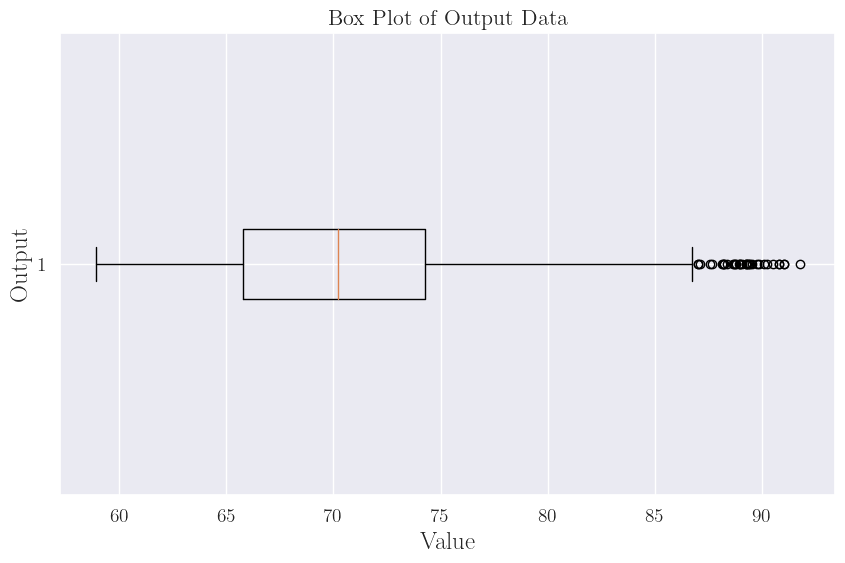

In [9]:
# Plot box plot for the y output
plt.figure(figsize=(10, 6))
plt.boxplot(y, vert=False)
plt.title('Box Plot of Output Data')
plt.xlabel('Value')
plt.ylabel('Output')
plt.show()

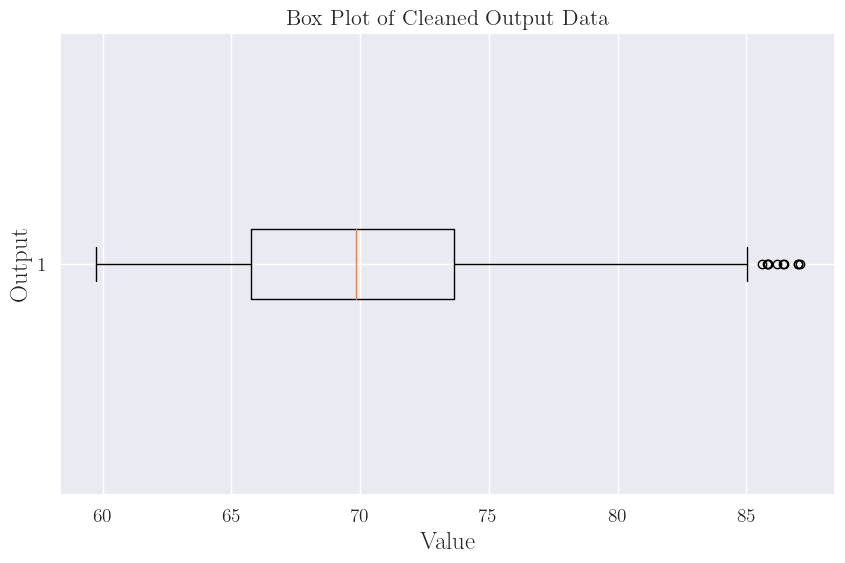

In [10]:
# Plot box plot for the y output
plt.figure(figsize=(10, 6))
plt.boxplot(y_clean, vert=False)
plt.title('Box Plot of Cleaned Output Data')
plt.xlabel('Value')
plt.ylabel('Output')
plt.show()

In [11]:
X, y = X_clean, y_clean

In [12]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

# Define the pipeline for the inputs
input_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Define the pipeline for the outputs
output_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Apply the transformations to the train and test data
X_train_scaled = input_pipeline.fit_transform(X_train)
X_test_scaled = input_pipeline.transform(X_test)

y_train_scaled = output_pipeline.fit_transform(y_train)
y_test_scaled = output_pipeline.transform(y_test)

def objective(trial):
    # Define the parameters to be optimized C 97.60025765845916, 'epsilon': 0.027186485496590345, 'gamma': 6.876942247533427} original?
    #{'C': 37.56126164554985, 'epsilon': 0.00036770904735790213, 'gamma': 9.248903174968495} 98
    C = trial.suggest_loguniform('C', 1e-4, 10e4)
    epsilon = trial.suggest_loguniform('epsilon', 1e-4, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e3)
    
    # Create the SVR model with the current set of hyperparameters
    svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    
    # Wrap the SVR in a MultiOutputRegressor
    multi_svr = MultiOutputRegressor(svr, n_jobs=1)
    
    # Fit the model
    multi_svr.fit(X_train_scaled, y_train_scaled)
    
    # Predict on the test set
    y_test_pred = multi_svr.predict(X_test_scaled)
    
    # Inverse transform the predictions and the true values for comparison
    y_test_pred_inv = output_pipeline.inverse_transform(y_test_pred)
    y_test_inv = output_pipeline.inverse_transform(y_test_scaled)
    
    # Calculate the R² score
    test_r2 = r2_score(y_test_inv, y_test_pred_inv)
    
    return test_r2

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

# Print the best model parameters
print("Best model parameters:")
print(study.best_params)

# Train the best model
best_params = study.best_params
best_svr = SVR(C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
best_multi_svr = MultiOutputRegressor(best_svr, n_jobs=1)
best_multi_svr.fit(X_train_scaled, y_train_scaled)

# Predict on train and test sets with the best model
y_train_pred = best_multi_svr.predict(X_train_scaled)
y_test_pred = best_multi_svr.predict(X_test_scaled)

# Inverse transform the predictions and the true values for comparison
y_train_pred_inv = output_pipeline.inverse_transform(y_train_pred)
y_test_pred_inv = output_pipeline.inverse_transform(y_test_pred)
y_train_inv = output_pipeline.inverse_transform(y_train_scaled)
y_test_inv = output_pipeline.inverse_transform(y_test_scaled)

# Calculate R² scores
train_r2 = r2_score(y_train_inv, y_train_pred_inv)
test_r2 = r2_score(y_test_inv, y_test_pred_inv)

# Print the R² scores
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


[I 2024-08-06 16:50:18,716] A new study created in memory with name: no-name-2311604d-debf-4cc5-84b7-206f0b8cf7a3
[I 2024-08-06 16:50:29,690] Trial 0 finished with value: 0.98139390954571 and parameters: {'C': 37.56126164554985, 'epsilon': 0.00036770904735790213, 'gamma': 9.248903174968495}. Best is trial 0 with value: 0.98139390954571.


Best model parameters:
{'C': 37.56126164554985, 'epsilon': 0.00036770904735790213, 'gamma': 9.248903174968495}
Train R² Score: 0.9960
Test R² Score: 0.9814


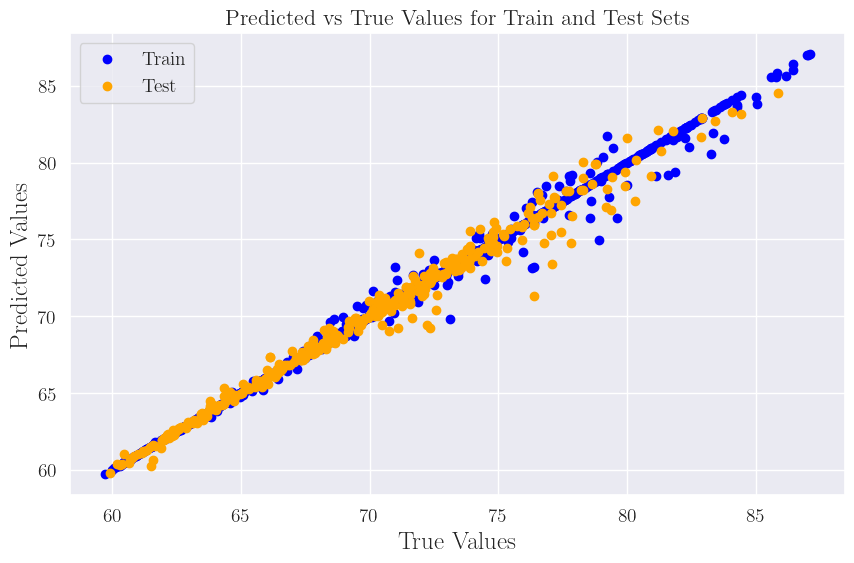

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train_inv, y_train_pred_inv, color='blue', label='Train')
plt.scatter(y_test_inv, y_test_pred_inv, color='orange', label='Test')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values for Train and Test Sets')
plt.legend()
plt.show()


In [14]:
import joblib

# Save the fitted model and preprocessing pipelines
joblib.dump(best_multi_svr, 'flutter_multi_svr.pkl')
joblib.dump(input_pipeline, 'flutter_input_pipeline.pkl')
joblib.dump(output_pipeline, 'flutter_output_pipeline.pkl')


['flutter_output_pipeline.pkl']

In [15]:

# Define your specific set of input data
specific_input_data = {
    'Mach': 0.001,
    'Density1' : 930,
    'YoungsModulus3': 7.1e+10,
    'Poisson3' : 0.33
}

# Convert specific input data to DataFrame
X_new = pd.DataFrame([specific_input_data])

# Transform the input data using the same pipeline
X_new_scaled = input_pipeline.transform(X_new)

# Make predictions using the specific input data
predictions_scaled = best_multi_svr.predict(X_new_scaled)

# Inverse transform the predictions to get the actual values
predictions = output_pipeline.inverse_transform(predictions_scaled)

# Display the predictions
print("Predictions for the specific input data:")
print(predictions)


Predictions for the specific input data:
[[66.84913126]]
